### Import libraries, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

### Read in data

In [5]:
path = '../data/final_df.csv'
data = pd.read_csv(path)
df = data.set_index('Date')
df.index = pd.to_datetime(df.index)

### Convert to RPI only format I've used before

In [6]:
df_RPI_CPI = df[['RPI', 'CPI']]
df_RPI = df_RPI_CPI.drop('CPI', axis=1)
df_RPI.index = pd.to_datetime(df_RPI.index)
df_RPI['Date'] = df_RPI.index
df_RPI.index = pd.RangeIndex(start=0, stop=len(df_RPI))

### Funciton to convert a number to yyyy-mm

In [7]:
def mmyyyy(no_months):
    yyyy = 2000 + no_months // 12
    mm = no_months % 12
    if mm == 0:
        mm = 12
    return f'{yyyy}-{"{:02d}".format(mm)}'

### Define DataFrame names for easy looping

In [8]:
dataframes = {}
est_frames = {}

for i in range(229):
    months = 109 + i
    start = mmyyyy(months)
    end = mmyyyy(months+60)
    dataframes[f'df_RPI_{start}_{end}'] = df_RPI[0*12+i:0*12+i+60]
#     print(f'start = {start}, end = {end}')
    start_test = mmyyyy(months+60)
    end_test = mmyyyy(months+60+1)
    dataframes[f'df_RPI_{start_test}_{end_test}'] = df_RPI[0*12+i+60:0*12+i+61]

### SARIMAX: train 5y periods to estimate the next month -- 2009 to current

In [9]:
mape_list = []
YOY_error_0_list = []
YOY_actual0_list = []

for i in range(100, 104):
    months = 109 + i
    
    start = mmyyyy(months)
    end = mmyyyy(months+60)
    df5y = dataframes[f'df_RPI_{start}_{end}']
    
    start_test = mmyyyy(months+60)
    end_test = mmyyyy(months+60+1)
    df5y1m = dataframes[f'df_RPI_{start_test}_{end_test}']
    
    model=sm.tsa.statespace.SARIMAX(df5y['RPI'],order=(2, 0, 1),seasonal_order=(1,1,2,12))
    results=model.fit()

    abc = results.predict(start=60,end=61,dynamic=True)
    aaa = pd.DataFrame(abc)

    mape = 0
    YOY_error_0 = 0

    YOY_error_0_list.append(pd.DataFrame(aaa['predicted_mean']).iloc[0]['predicted_mean']/df5y.iloc[48]['RPI'] - df5y1m.iloc[0]['RPI']/df5y.iloc[48]['RPI'])
    YOY_actual0_list.append(df5y1m.iloc[0]['RPI']/df5y.iloc[48]['RPI'] - 1)

/home/amirel/.pyenv/versions/3.8.12/envs/lewagon2/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/amirel/.pyenv/versions/3.8.12/envs/lewagon2/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/amirel/.pyenv/versions/3.8.12/envs/lewagon2/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.34721D+01    |proj g|=  4.01729D+01

At iterate    5    f=  1.77001D+00    |proj g|=  1.66591D-01

At iterate   10    f=  1.61565D+00    |proj g|=  2.06563D-02

At iterate   15    f=  1.60994D+00    |proj g|=  3.44157D-03

At iterate   20    f=  1.60891D+00    |proj g|=  2.08340D-03

At iterate   25    f=  1.60755D+00    |proj g|=  1.94875D-03

At iterate   30    f=  1.60724D+00    |proj g|=  1.61747D-03

At iterate   35    f=  1.60720D+00    |proj g|=  2.12614D-04

At iterate   40    f=  1.60719D+00    |proj g|=  2.94513D-04

At iterate   45    f=  1.60719D+00    |proj g|=  2.16298D-04

At iterate   50    f=  1.60719D+00    |proj g|=  1.12245D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/amirel/.pyenv/versions/3.8.12/envs/lewagon2/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/amirel/.pyenv/versions/3.8.12/envs/lewagon2/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/amirel/.pyenv/versions/3.8.12/envs/lewagon2/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/amirel/.pyenv/versions/3.8.12/envs/lewagon2/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameter

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72672D+01    |proj g|=  4.73661D+01

At iterate    5    f=  1.79600D+00    |proj g|=  1.94292D-01

At iterate   10    f=  1.62037D+00    |proj g|=  9.87172D-03

At iterate   15    f=  1.61267D+00    |proj g|=  3.24348D-03

At iterate   20    f=  1.61195D+00    |proj g|=  1.55197D-03

At iterate   25    f=  1.61118D+00    |proj g|=  4.14396D-03

At iterate   30    f=  1.61031D+00    |proj g|=  5.36370D-03

At iterate   35    f=  1.61019D+00    |proj g|=  1.89428D-04

At iterate   40    f=  1.61015D+00    |proj g|=  4.88563D-04

At iterate   45    f=  1.61015D+00    |proj g|=  2.77357D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/amirel/.pyenv/versions/3.8.12/envs/lewagon2/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/amirel/.pyenv/versions/3.8.12/envs/lewagon2/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   15    f=  1.61800D+00    |proj g|=  4.13791D-03

At iterate   20    f=  1.61694D+00    |proj g|=  1.50886D-03

At iterate   25    f=  1.61597D+00    |proj g|=  5.59692D-03

At iterate   30    f=  1.61476D+00    |proj g|=  8.96169D-04

At iterate   35    f=  1.61470D+00    |proj g|=  1.92634D-03

At iterate   40    f=  1.61464D+00    |proj g|=  1.10284D-03

At iterate   45    f=  1.61463D+00    |proj g|=  2.43683D-04

At iterate   50    f=  1.61463D+00    |proj g|=  6.88580D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57      1     0     0   6.886D-05   1.615D+00
  F =   1.61462657245

/home/amirel/.pyenv/versions/3.8.12/envs/lewagon2/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/amirel/.pyenv/versions/3.8.12/envs/lewagon2/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/amirel/.pyenv/versions/3.8.12/envs/lewagon2/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60441D+02    |proj g|=  3.29745D+02

At iterate    5    f=  2.09986D+00    |proj g|=  7.13156D-01

At iterate   10    f=  1.66170D+00    |proj g|=  3.97078D-02

At iterate   15    f=  1.62940D+00    |proj g|=  8.45658D-03

At iterate   20    f=  1.62768D+00    |proj g|=  1.13096D-03

At iterate   25    f=  1.62592D+00    |proj g|=  9.42376D-03

At iterate   30    f=  1.62519D+00    |proj g|=  6.65615D-04

At iterate   35    f=  1.62507D+00    |proj g|=  7.98344D-04

At iterate   40    f=  1.62505D+00    |proj g|=  3.07184D-04

At iterate   45    f=  1.62505D+00    |proj g|=  2.97245D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


In [10]:
dfdfdf = pd.DataFrame(YOY_error_0_list)

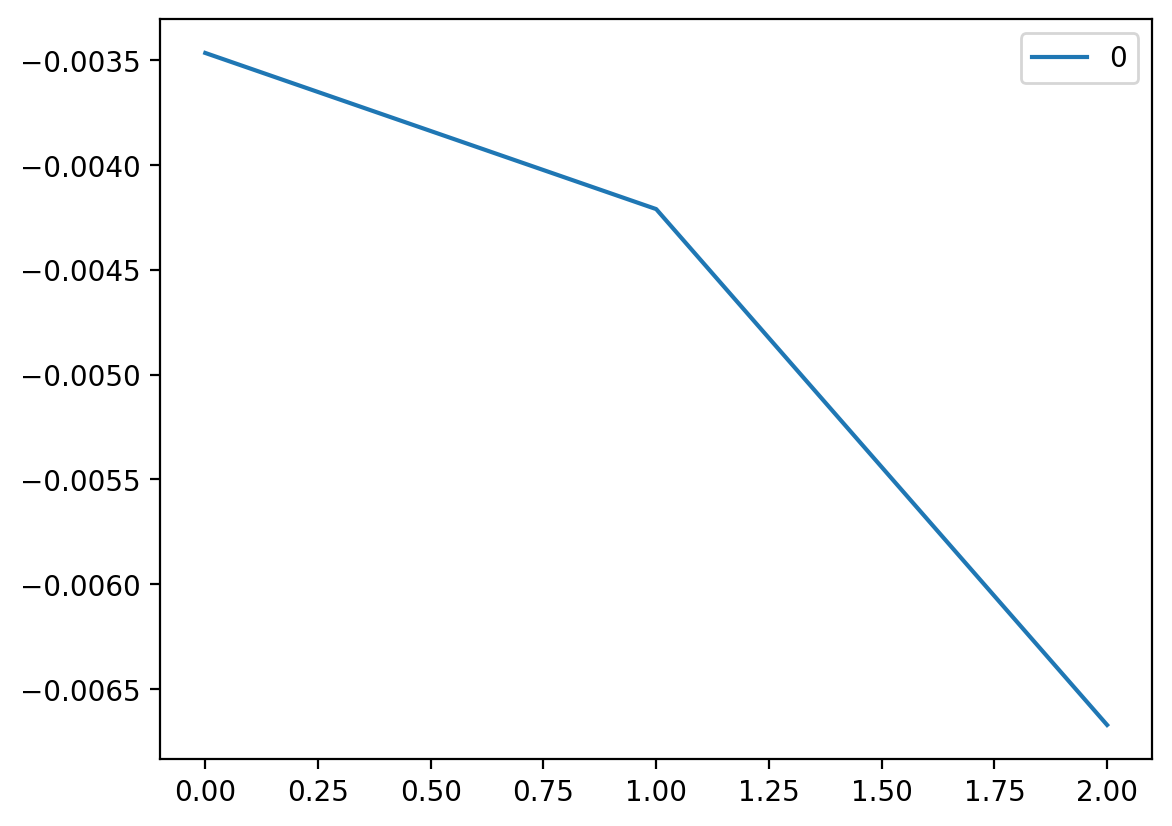

In [11]:
dfdfdf.plot();

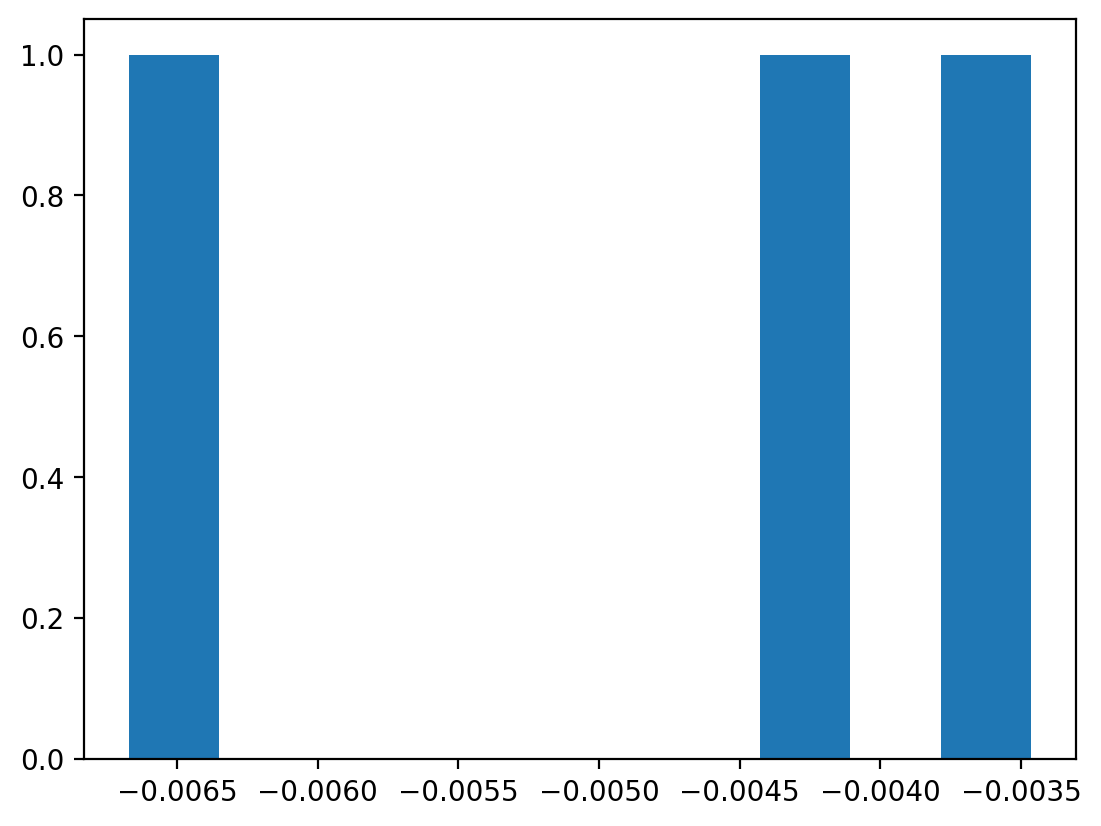

In [12]:
plt.hist(dfdfdf);

In [13]:
dm_prediction = round(aaa['predicted_mean'].iloc[0], 1)
dm_prediction

345.7

In [14]:
print(f"Estimated RPI for {df_RPI['Date'].iloc[aaa.index[0]]} = {round(aaa['predicted_mean'].iloc[0], 1)}")

Estimated RPI for 2022-08-01 00:00:00 = 345.7


In [15]:
results.predict(start=60)

163    345.712855
dtype: float64

In [16]:
results.save("sarimax-monthly.pickle")

In [19]:
import pickle

In [23]:
model = pickle.load(open('../data/sarimax-monthly.pickle', 'rb'))

In [24]:
model.predict(start = 60)

163    345.711563
dtype: float64